In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Data from RL evaluation (test dataset, 3 rollouts)
data = {
    'Qwen3-4B Base': {
        'r1': [0.5, 1.0, 0.667, 0.0, 0.0, 0.4, 0.0, -2.0, 1.0, -2.0, 1.0, 0.667, 0.5, -2.0, 1.0, 0.035, -2.0, -2.0, 0.0, -2.0, 1.0, 0.0, 0.4, 0.0, 1.0, 0.0, 0.667, 0.0, 0.0, 0.0, 0.0, 0.5, -2.0, 0.0, 0.0, 0.0, -2.0, 1.0, 1.0, 0.0, 0.5, 0.25, 0.333, 0.0, 0.0, 0.5, 0.0, -2.0, 0.667, 0.667, -2.0, 0.5, 0.0, 0.0, 0.333, 0.4, 0.0, -2.0, 0.5, 0.0],
        'r2': [0.4, 1.0, 0.5, 0.0, 0.4, 0.333, 0.0, 0.333, 0.0, 0.0, 1.0, 0.0, 1.0, -2.0, 0.667, 0.0, -2.0, 0.0, 0.0, 0.667, 1.0, 0.0, 0.667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.333, 1.0, -2.0, 0.0, -2.0, 0.286, 0.0, 1.0, -2.0, 0.5, 0.25, 0.0, -2.0, 0.0, 0.286, 0.0, -2.0, 0.667, 0.0, 0.0, 0.5, 0.667, 0.0, 0.5, 0.0, 0.5, 0.0, 0.222, 0.0, 0.4, 0.0, 0.4],
        'r3': [-2.0, 1.0, 0.5, -2.0, 0.333, 0.667, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.667, 0.0, 1.0, 1.0, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 1.0, -2.0, 1.0, -2.0, 1.0, 0.182, 0.25, 0.0, 0.0, -2.0, 1.0, 0.333, 0.5, 0.0, -2.0, 0.286, 0.4, 0.182, 0.4, 0.0, 0.0, 0.5, 0.0, -2.0, 0.667, 0.0, 0.222, 0.0, 0.667, 0.0, 0.667, 0.0, 0.0],
        'avg': 0.007,
        'std': 0.875
    },
    'Qwen3-8B Base': {
        'r1': [0.5, 1.0, 1.0, 0.333, 0.333, 0.286, 0.4, -2.0, 1.0, -2.0, 0.333, 1.0, 0.5, -2.0, 1.0, 0.0, 0.667, 0.182, 0.333, 1.0, 1.0, 0.0, 0.286, 0.667, 0.25, 0.4, -2.0, -2.0, -2.0, 1.0, -2.0, 0.667, 0.0, 0.2, 0.5, 0.0, -2.0, 0.667, 0.286, 0.286, 0.5, 0.0, 0.222, 0.333, -2.0, 0.0, 0.0, 0.5, 0.5, 0.4, -2.0, 0.667, 0.5, 0.4, 0.4, 0.4, 1.0, 1.0, 0.4, 0.0],
        'r2': [-2.0, -2.0, 0.667, -2.0, 0.4, 0.4, 0.5, 0.333, 1.0, -2.0, 0.5, 0.667, 1.0, 0.333, 0.667, 0.0, 0.667, 0.333, 0.4, 0.667, 1.0, 0.0, 0.333, 0.0, 0.25, 0.0, 0.667, 1.0, -2.0, 0.667, -2.0, 0.286, 0.0, 0.25, 0.667, 0.0, -2.0, 0.667, 0.5, 0.333, 0.5, 0.2, 0.25, 0.4, 0.4, 0.333, 0.0, 0.0, 0.5, 0.5, -2.0, 0.0, 1.0, 0.4, 0.4, 0.25, 0.667, 0.667, 1.0, 0.0],
        'r3': [0.5, -2.0, 0.5, -2.0, 0.333, 0.4, 0.0, 0.143, 1.0, 0.286, 0.667, 0.5, 1.0, -2.0, 1.0, 0.0, 1.0, 0.333, 0.0, 1.0, 1.0, 0.0, -2.0, 0.0, 0.091, 0.0, 0.5, 0.4, -2.0, 1.0, -2.0, 0.222, 0.0, 0.0, 0.5, 0.333, 0.5, 0.667, 0.286, 0.333, 0.4, 0.053, 0.286, 0.5, -2.0, 0.4, 0.0, 0.0, 0.667, 0.0, -2.0, 0.0, 0.0, 0.5, 0.333, 0.5, 0.5, 0.667, 0.667, 0.0],
        'avg': 0.077,
        'std': 0.903
    },
    'RL 4B Step-120': {
        'r1': [0.5, 1.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.667, 1.0, 0.0, 1.0, 0.0, 1.0, 0.5, 1.0, 0.0, 0.667, 0.0, 0.0, 0.667, 1.0, 0.0, 0.5, 0.0, 1.0, 0.667, 1.0, 0.0, 0.0, 0.667, 0.5, 0.0, 0.0, 0.286, 1.0, 0.0, 0.667, 0.667, 0.25, 0.0, 1.0, 0.0, 0.167, 0.0, 0.0, -2.0, 0.0, 0.0, 0.667, 1.0, 0.333, 0.667, 1.0, 0.5, 0.0, 0.4, 0.0, 0.5, 0.667, 0.0],
        'r2': [0.0, 1.0, 0.333, 0.0, 0.667, 0.667, 0.333, 0.0, 0.0, 0.25, 0.667, 0.0, 1.0, 0.0, 0.667, 0.0, 0.667, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.667, 0.0, 0.667, 0.667, 1.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.667, 0.667, 0.0, 0.0, 1.0, 0.667, 0.0, 0.0, 0.0, 0.667, 0.0, 0.667, 0.0, 1.0, 0.5, 0.0],
        'r3': [0.5, 1.0, 1.0, 0.0, 0.4, 1.0, 0.333, 0.0, 1.0, 0.0, 1.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.5, 0.0, 0.5, 0.667, 1.0, 0.0, 0.333, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.667, 0.667, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.667, 0.0, 1.0, 0.0, 0.0, 1.0, 0.667, 0.667, 0.0, 0.1, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.667, 0.0],
        'avg': 0.383,
        'std': 0.446
    },
    'RL 4B Step-140': {
        'r1': [0.5, 0.667, 1.0, 0.0, 0.5, 0.667, 0.333, 0.0, 1.0, -2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.667, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.333, 1.0, 0.0, 0.333, 0.667, 0.0, -2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.667, 0.667, 0.5, 0.5, 0.0, 0.0, 0.667, 0.667, 0.286, 0.5, 0.667, 0.4, 0.0, 0.667, 0.0, 0.667, 0.0, 0.0],
        'r2': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.667, 1.0, -2.0, 0.667, 1.0, 0.667, 0.0, 1.0, 0.0, 0.5, 0.667, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.333, 1.0, 0.0, 0.0, 1.0, 0.0, 0.667, 1.0, 0.667, 0.0, 0.0, 0.0, 0.0, 0.5, 0.667, 0.0, 0.0, 0.0, 1.0, 0.4, 0.0, 0.0, 0.667, 0.0, 0.0, 0.5, 0.0, 0.667, 0.0, 0.0],
        'r3': [0.0, 1.0, 0.333, 0.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.4, 1.0, 0.667, 1.0, 0.4, 1.0, 0.0, 0.667, 0.667, 0.4, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.333, 0.667, 0.25, 1.0, 0.0, 0.5, 1.0, 0.667, 0.667, 1.0, 1.0, 0.0, 0.5, 0.0, 0.0, 0.4, 0.667, 0.286, 0.0, 0.0, 1.0, 0.667, 0.0, 0.0, 0.667, 0.0, 0.5, 0.25, 0.0, 1.0, 1.0, 0.0],
        'avg': 0.382,
        'std': 0.514
    }
}

models = list(data.keys())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

print("✅ Data loaded successfully!")
print(f"Models: {', '.join(models)}")


✅ Data loaded successfully!
Models: Qwen3-4B Base, Qwen3-8B Base, RL 4B Step-120, RL 4B Step-140


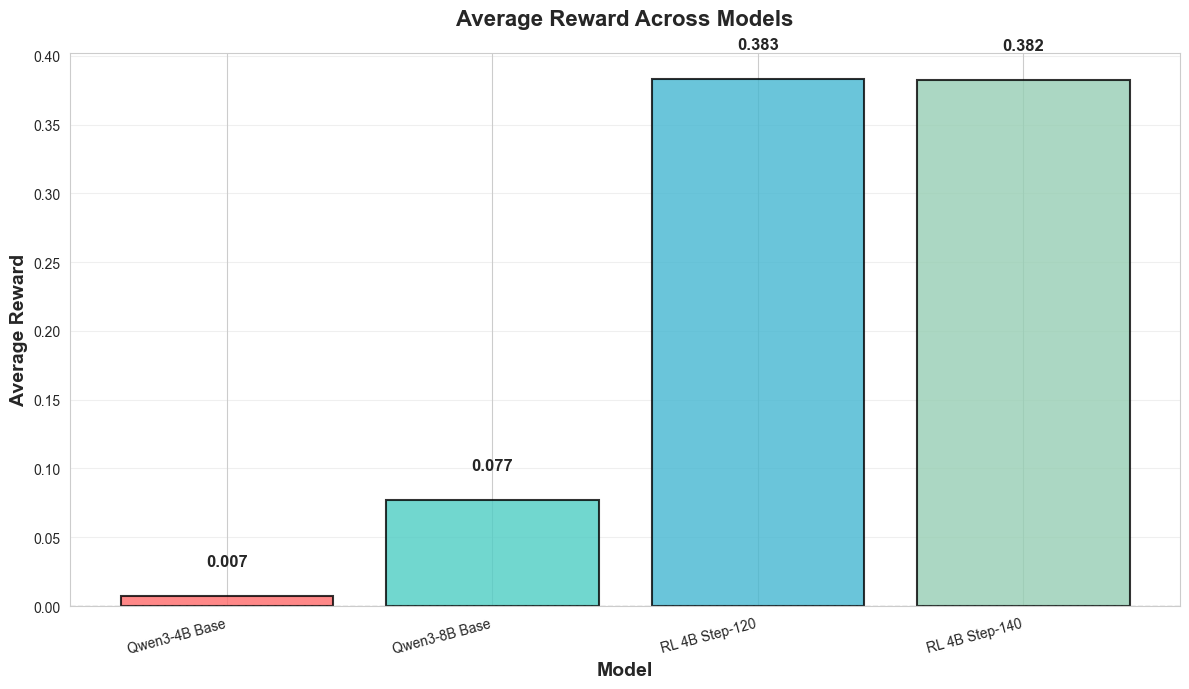

In [2]:
# Chart 1: Average Reward Across Models
fig, ax = plt.subplots(figsize=(12, 7))

avgs = [data[m]['avg'] for m in models]

bars = ax.bar(models, avgs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar, avg in zip(bars, avgs):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{avg:.3f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.set_ylabel('Average Reward', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Average Reward Across Models', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

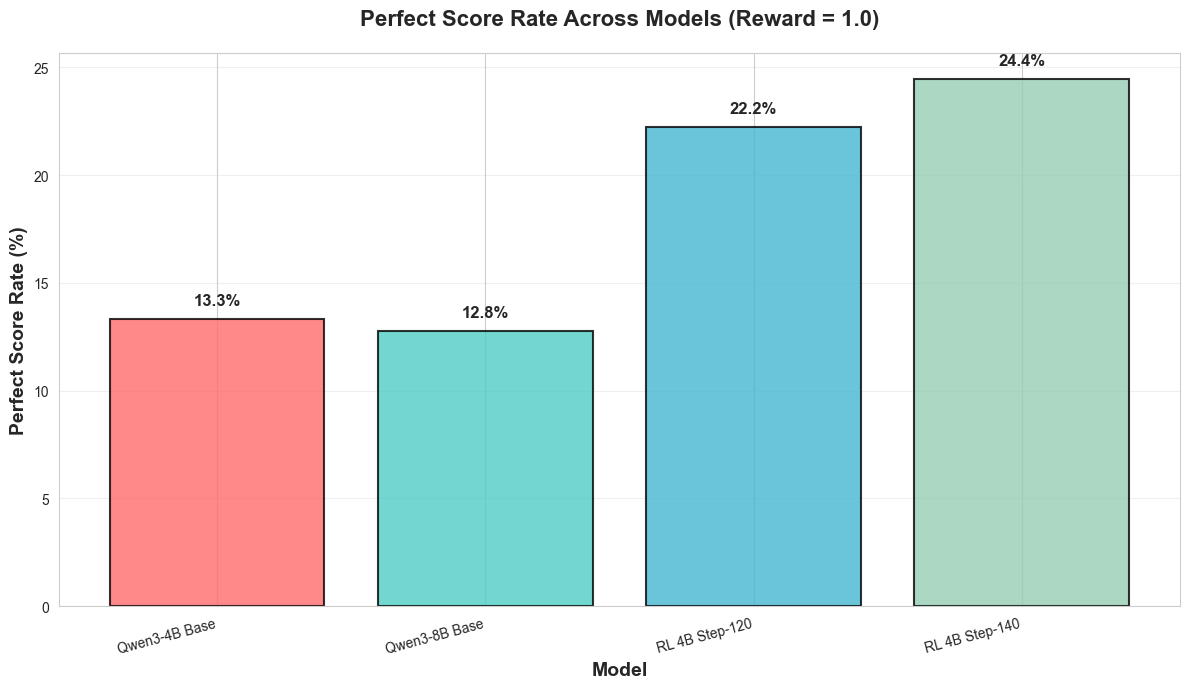

In [3]:
# Chart 2: Perfect Score Rate Across Models
fig, ax = plt.subplots(figsize=(12, 7))

perfect_rates = []
for model_name in models:
    all_rewards = data[model_name]['r1'] + data[model_name]['r2'] + data[model_name]['r3']
    perfects = sum(1 for r in all_rewards if r == 1.0)
    perfect_rates.append(perfects / len(all_rewards) * 100)

bars = ax.bar(models, perfect_rates, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar, rate in zip(bars, perfect_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Perfect Score Rate (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Perfect Score Rate Across Models (Reward = 1.0)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


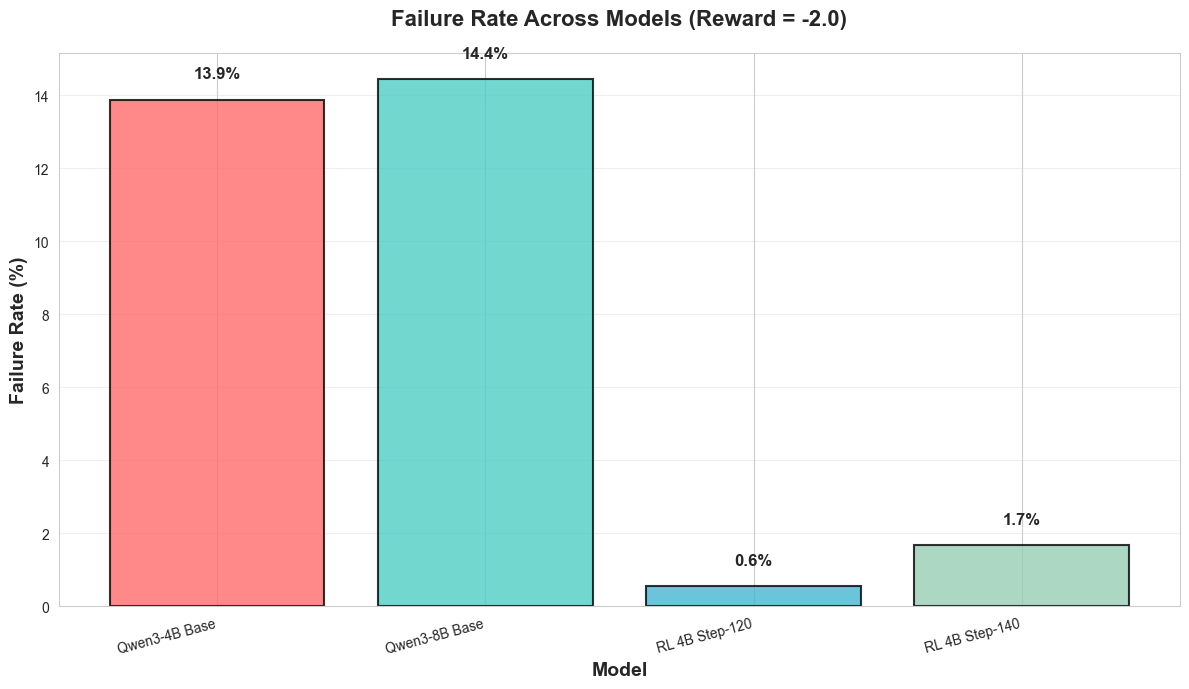

In [4]:
# Chart 3: Failure Rate Across Models
fig, ax = plt.subplots(figsize=(12, 7))

failure_rates = []
for model_name in models:
    all_rewards = data[model_name]['r1'] + data[model_name]['r2'] + data[model_name]['r3']
    failures = sum(1 for r in all_rewards if r == -2.0)
    failure_rates.append(failures / len(all_rewards) * 100)

bars = ax.bar(models, failure_rates, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar, rate in zip(bars, failure_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Failure Rate (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Failure Rate Across Models (Reward = -2.0)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


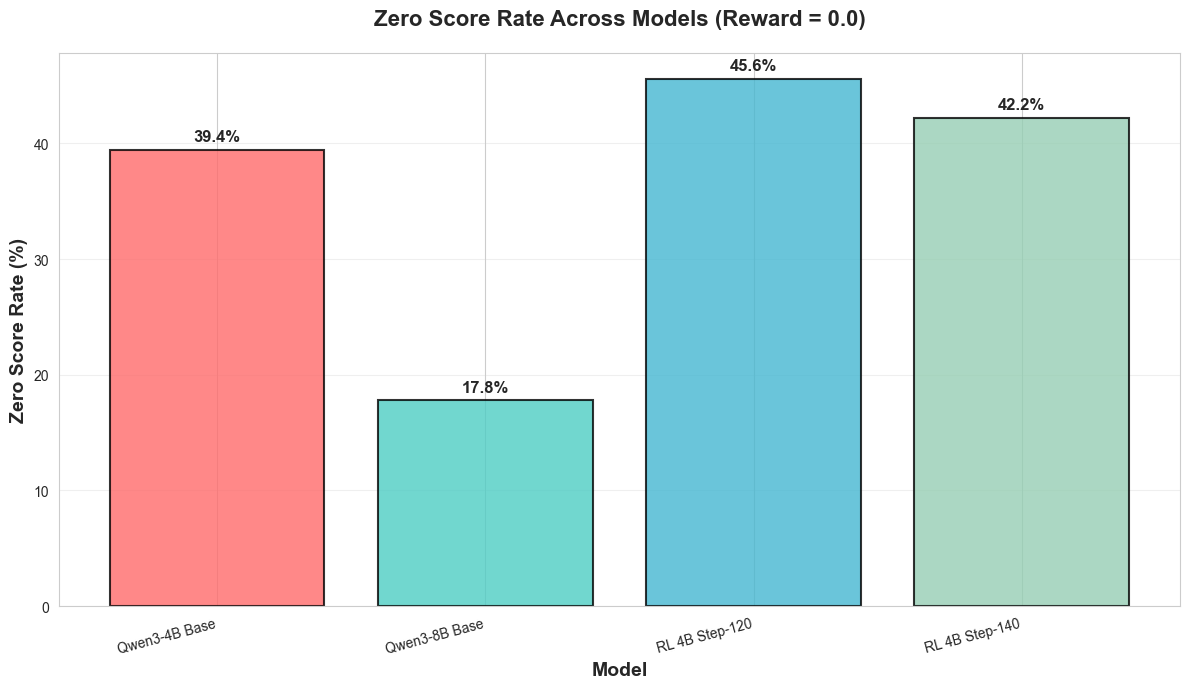

In [7]:
# Chart: Zero Score Rate Across Models
fig, ax = plt.subplots(figsize=(12, 7))

zero_rates = []
for model_name in models:
    all_rewards = data[model_name]['r1'] + data[model_name]['r2'] + data[model_name]['r3']
    zeros = sum(1 for r in all_rewards if r == 0.0)
    zero_rates.append(zeros / len(all_rewards) * 100)

bars = ax.bar(models, zero_rates, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar, rate in zip(bars, zero_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Zero Score Rate (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Zero Score Rate Across Models (Reward = 0.0)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

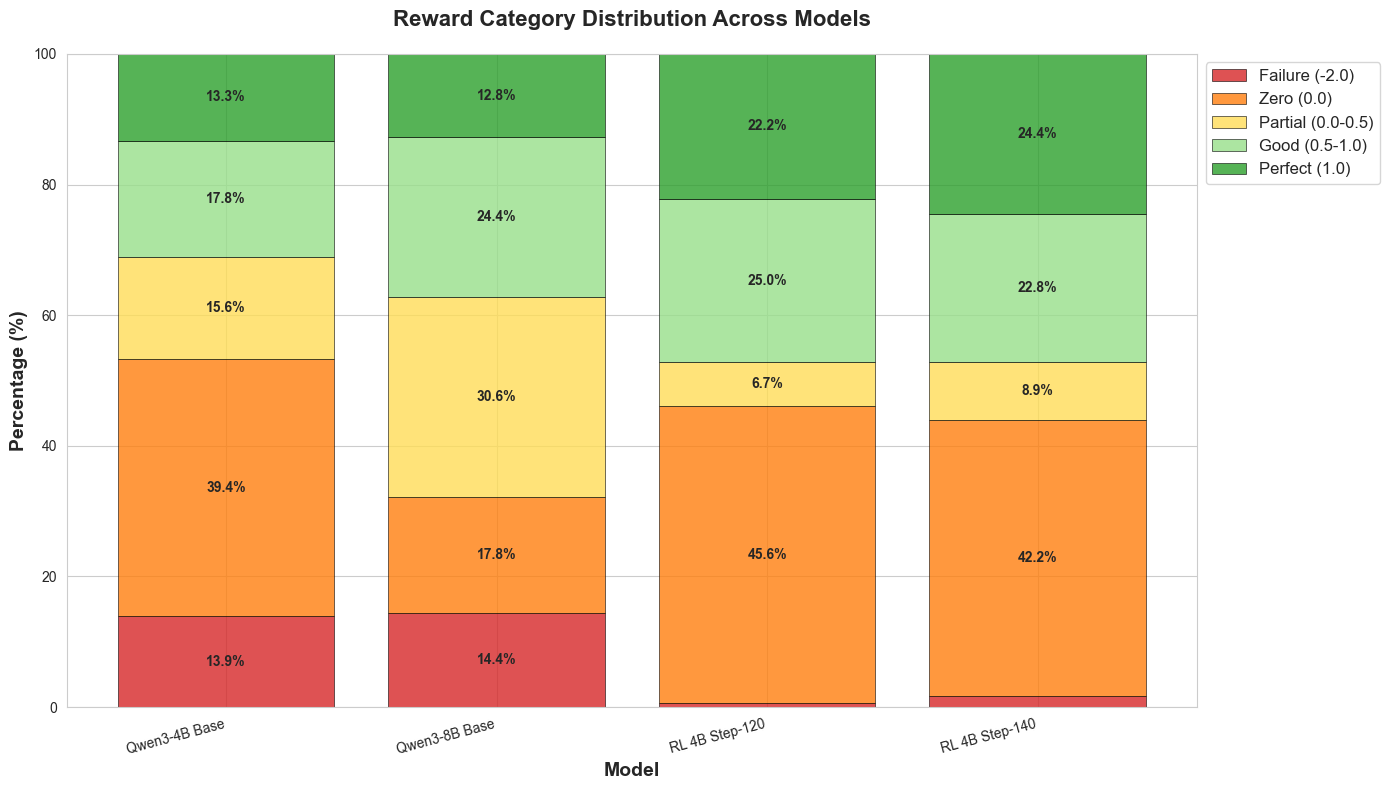

In [5]:
# Chart 4: Reward Category Distribution (Stacked Bar Chart)
fig, ax = plt.subplots(figsize=(14, 8))

categories = {
    'Failure (-2.0)': lambda r: r == -2.0,
    'Zero (0.0)': lambda r: r == 0.0,
    'Partial (0.0-0.5)': lambda r: 0.0 < r < 0.5,
    'Good (0.5-1.0)': lambda r: 0.5 <= r < 1.0,
    'Perfect (1.0)': lambda r: r == 1.0
}

category_data = {cat: [] for cat in categories.keys()}

for model_name in models:
    all_rewards = data[model_name]['r1'] + data[model_name]['r2'] + data[model_name]['r3']
    total = len(all_rewards)
    
    for cat_name, cat_func in categories.items():
        count = sum(1 for r in all_rewards if cat_func(r))
        category_data[cat_name].append(count / total * 100)

bottom = np.zeros(len(models))
category_colors = ['#d62728', '#ff7f0e', '#ffdd57', '#98df8a', '#2ca02c']

for (cat_name, percentages), color in zip(category_data.items(), category_colors):
    bars = ax.bar(models, percentages, bottom=bottom, label=cat_name, 
                   color=color, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        if pct > 3:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., bottom[i] + height/2,
                   f'{pct:.1f}%',
                   ha='center', va='center', fontsize=10, fontweight='bold')
    
    bottom += percentages

ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Reward Category Distribution Across Models', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
ax.set_ylim(0, 100)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


In [6]:
# Summary Statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

summary_data = []
for model_name in models:
    all_rewards = data[model_name]['r1'] + data[model_name]['r2'] + data[model_name]['r3']
    failures = sum(1 for r in all_rewards if r == -2.0)
    perfects = sum(1 for r in all_rewards if r == 1.0)
    
    summary_data.append({
        'Model': model_name,
        'Avg Reward': f"{data[model_name]['avg']:.3f}",
        'Std Dev': f"{data[model_name]['std']:.3f}",
        'Perfect %': f"{perfects / len(all_rewards) * 100:.1f}%",
        'Failure %': f"{failures / len(all_rewards) * 100:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


SUMMARY STATISTICS
         Model Avg Reward Std Dev Perfect % Failure %
 Qwen3-4B Base      0.007   0.875     13.3%     13.9%
 Qwen3-8B Base      0.077   0.903     12.8%     14.4%
RL 4B Step-120      0.383   0.446     22.2%      0.6%
RL 4B Step-140      0.382   0.514     24.4%      1.7%
